<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-5-(Work-by:-Zhengpeng)" data-toc-modified-id="Task-5-(Work-by:-Zhengpeng)-1">Task 5 (Work by: Zhengpeng)</a></span></li><li><span><a href="#1.-Hierarchical-clustering-Visualisation-and-evaluation-functions" data-toc-modified-id="1.-Hierarchical-clustering-Visualisation-and-evaluation-functions-2">1. Hierarchical clustering Visualisation and evaluation functions</a></span></li><li><span><a href="#2.-α" data-toc-modified-id="2.-α-3">2. α</a></span></li><li><span><a href="#3.-β" data-toc-modified-id="3.-β-4">3. β</a></span></li><li><span><a href="#3.-Combine" data-toc-modified-id="3.-Combine-5">3. Combine</a></span></li></ul></div>

# Task 5 (Work by: Zhengpeng)

In [35]:
import pandas as pd
import numpy as np

In [36]:
from tcrdist.repertoire import TCRrep
file_path = r'vdjdb.csv'
df = pd.read_csv(file_path)

In [38]:
# 1.2.1 Add 'clone_id'
data = df.iloc[:, list(range(0, 12)) + [16]]  
# Add a column of 'clone_id' to all rows
data = data.assign(clone_id = '')
# Give the 'clone_id' record with zero complex.id the value:
# clone_0_{number of rows in the original record}
zero_complex_ids = data[data['complex.id'] == 0].index
data.loc[zero_complex_ids, 'clone_id'] = zero_complex_ids.map(
    lambda x: f'clone_0_{x}')

# Give the 'clone_id' record with non-zero complex.id the value:
# clone_1_{complex.id of the original record}
non_zero_complex_ids = data[data['complex.id'] != 0]['complex.id'].unique()
for complex_id in non_zero_complex_ids:
    indices = data[data['complex.id'] == complex_id].index
    data.loc[indices, 'clone_id'] = f'clone_1_{complex_id}'

In [39]:
data_copy = data[data['complex.id'] == 0].copy()
data_copy['gene'] = data_copy['gene'].map({'TRA': 'TRB', 'TRB': 'TRA'})
# set all columns except 'complex.id', 'clone_id' and the modified 'gene' column to e,.
for col in data_copy.columns:
    if col not in ['complex.id', 'species', 'antigen.gene', 'count', 'clone_id','gene']:
        data_copy[col] = np.nan

# Merge original and copied data
data_copy = pd.concat([data, data_copy], ignore_index=True)
data_copy[data_copy['complex.id']!=0]

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,clone_id
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_2
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2.0,clone_1_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0.0,clone_1_30592
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2.0,clone_1_30593
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2.0,clone_1_30593
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0.0,clone_1_30594


In [40]:
data_copy['count'] = 1

In [41]:
df = data_copy.iloc[:, list(range(0, 6)) + [9,12,13,14]]
df[df['complex.id']!=0]

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,vdjdb.score,clone_id,count
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,2.0,clone_1_1,1
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,2.0,clone_1_1,1
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,2.0,clone_1_2,1
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,2.0,clone_1_2,1
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,FLKEKGGL,2.0,clone_1_3,1
...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,PQQPFPQPEQPFP,0.0,clone_1_30592,1
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,PQQPFPQPEQPFP,2.0,clone_1_30593,1
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,PQQPFPQPEQPFP,2.0,clone_1_30593,1
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,PQQPFPQPEQPFP,0.0,clone_1_30594,1


In [42]:
df[df['complex.id']==0]

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,vdjdb.score,clone_id,count
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,2.0,clone_0_2,1
11,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL,2.0,clone_0_11,1
18,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKETGGL,2.0,clone_0_18,1
25,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEMGGL,2.0,clone_0_25,1
30,0,TRB,CASSFGVEDEQYF,TRBV7-2*01,TRBJ2-7*01,HomoSapiens,LQPFPQPELPYPQPQ,1.0,clone_0_30,1
...,...,...,...,...,...,...,...,...,...,...
124349,0,TRB,NaN,NaN,NaN,HomoSapiens,NaN,NaN,clone_0_92664,1
124350,0,TRB,NaN,NaN,NaN,HomoSapiens,NaN,NaN,clone_0_92665,1
124351,0,TRB,NaN,NaN,NaN,HomoSapiens,NaN,NaN,clone_0_92666,1
124352,0,TRA,NaN,NaN,NaN,HomoSapiens,NaN,NaN,clone_0_92667,1


In [43]:
#1.2.5yutong
df['antigen.epitope'].fillna('empty', inplace=True)
df.isnull().sum()

D:\AJumpy\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


complex.id             0
gene                   0
cdr3               31583
v.segm             31684
j.segm             32728
species                0
antigen.epitope        0
vdjdb.score        31583
clone_id               0
count                  0
dtype: int64

In [44]:
df_wide = df.pivot_table(index=['clone_id','complex.id', 'species', 'antigen.epitope', 'vdjdb.score', 'count'], columns='gene', values=[
                         'cdr3', 'v.segm', 'j.segm'], aggfunc='first').reset_index()
# df_wide.columns
df_wide.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0]
                   for col in df_wide.columns]

df_wide.columns = ['clone_id', 'complex_id', 'organism', 'epitope','vdjdb_score', 'count', 'cdr3_a_aa',
                   'cdr3_b_aa', 'j_a_gene', 'j_b_gene', 'v_a_gene', 'v_b_gene']


In [45]:
# Create a Series containing all values from 1 to 30594
all_values = pd.Series(range(1, 30595))

# Found a value that is not in the 'complex_id' column
missing_values = all_values[~all_values.isin(df_wide['complex_id'])]

print("Missing values in 'complex_id' from 1 to 30594:")
print(missing_values)

Missing values in 'complex_id' from 1 to 30594:
Series([], dtype: int64)


In [46]:
df_wide.replace('empty', np.nan, inplace=True)

In [47]:
#1.2.6
df_wide['organism'].value_counts()

HomoSapiens      56985
MusMusculus       3073
MacacaMulatta     2119
Name: organism, dtype: int64

In [48]:
df_filtered = df_wide[df_wide['organism'].isin(
    ['HomoSapiens', 'MusMusculus'])].copy()

df_filtered.loc[df_filtered['organism'] ==
                'HomoSapiens', 'organism'] = 'human'
df_filtered.loc[df_filtered['organism'] ==
                'MusMusculus', 'organism'] = 'mouse'
df_filtered.head(3)

,clone_id,complex_id,organism,epitope,vdjdb_score,count,cdr3_a_aa,cdr3_b_aa,j_a_gene,j_b_gene,v_a_gene,v_b_gene
0,clone_0_100,0,human,LLQTGIHVRVSQPSL,0.0,1,NaN,CASTSGSFTGELFF,NaN,TRBJ2-2*01,NaN,TRBV5-1*01
1,clone_0_1000,0,human,KRWIILGLNK,0.0,1,NaN,CAWSLTGMNQPQHF,NaN,TRBJ1-5*01,NaN,TRBV30*01
2,clone_0_10000,0,human,NLVPMVATV,0.0,1,NaN,CASSQEALTGAKNIQYF,NaN,TRBJ2-4*01,NaN,TRBV4-3*01


In [49]:
#1.2.7
tcrdist_input = df_filtered

# Sort by value of column 'epitope'
tcrdist_input.sort_values(by='epitope', inplace=True)

tcrdist_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60058 entries, 37285 to 53194
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clone_id     60058 non-null  object 
 1   complex_id   60058 non-null  int64  
 2   organism     60058 non-null  object 
 3   epitope      60058 non-null  object 
 4   vdjdb_score  60058 non-null  float64
 5   count        60058 non-null  int64  
 6   cdr3_a_aa    37962 non-null  object 
 7   cdr3_b_aa    52690 non-null  object 
 8   j_a_gene     37004 non-null  object 
 9   j_b_gene     52590 non-null  object 
 10  v_a_gene     37957 non-null  object 
 11  v_b_gene     52681 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 6.0+ MB


In [50]:
alpha_input = tcrdist_input.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 10]]
beta_input = tcrdist_input.iloc[:, [0, 1, 2, 3, 4, 5, 7, 9, 11]]

In [51]:
alpha_input.head()

,clone_id,complex_id,organism,epitope,vdjdb_score,count,cdr3_a_aa,j_a_gene,v_a_gene
37285,clone_1_1513,1513,human,AAFKRSCLK,3.0,1,CVVNGNNNDMRF,TRAJ43*01,TRAV12-1*01
37296,clone_1_1514,1514,human,AAFKRSCLK,3.0,1,CVVNNNNNDMRF,TRAJ43*01,TRAV12-1*01
37307,clone_1_1515,1515,human,AAFKRSCLK,3.0,1,CAGARNDYKLSF,TRAJ20*01,TRAV25*01
37318,clone_1_1516,1516,human,AAFKRSCLK,3.0,1,CALATHTGTASKLTF,TRAJ44*01,TRAV38-1*01
37329,clone_1_1517,1517,human,AAFKRSCLK,3.0,1,CAGAIPRDDKIIF,TRAJ30*01,TRAV27*01


In [52]:
beta_input.head()

,clone_id,complex_id,organism,epitope,vdjdb_score,count,cdr3_b_aa,j_b_gene,v_b_gene
37285,clone_1_1513,1513,human,AAFKRSCLK,3.0,1,CASSQGFGANVLTF,TRBJ2-6*01,TRBV19*01
37296,clone_1_1514,1514,human,AAFKRSCLK,3.0,1,CASVSGQGVSPLHF,TRBJ1-6*01,TRBV19*01
37307,clone_1_1515,1515,human,AAFKRSCLK,3.0,1,CATSRDGAGLVNQPQHF,TRBJ1-5*01,TRBV15*01
37318,clone_1_1516,1516,human,AAFKRSCLK,3.0,1,CASSQDPGSSYNEQFF,TRBJ2-1*01,TRBV4-3*01
37329,clone_1_1517,1517,human,AAFKRSCLK,3.0,1,CASSLNPGRSDSPLHF,TRBJ2-1*01,TRBV7-6*01


In [53]:
##距离矩阵
mouse = tcrdist_input[tcrdist_input['organism'] == 'mouse']
human = tcrdist_input[tcrdist_input['organism'] == 'human']

mouse_alpha = alpha_input[alpha_input['organism'] == 'mouse']
mouse_beta = beta_input[alpha_input['organism'] == 'mouse']
human_alpha = alpha_input[alpha_input['organism'] == 'human']
human_beta = beta_input[alpha_input['organism'] == 'human']

mouse = mouse.dropna()
mouse_alpha = mouse_alpha.dropna()
mouse_beta = mouse_beta.dropna()

human = human.dropna()
human_alpha = human_alpha.dropna()
human_beta = human_beta.dropna()

In [54]:
# Create a Series containing the vdjdb_score distribution for each dataset
vdjdb_score_counts = {}

datasets = [mouse, mouse_alpha, mouse_beta, human, human_alpha, human_beta]
labels = ['Mouse', 'Mouse Alpha', 'Mouse Beta', 'Human', 'Human Alpha', 'Human Beta']

for dataset, label in zip(datasets, labels):
    vdjdb_score_counts[label] = dataset['vdjdb_score'].value_counts()

# Convert dictionary to DataFrame
vdjdb_score_counts_df = pd.DataFrame(vdjdb_score_counts)
vdjdb_score_counts_df = vdjdb_score_counts_df.rename_axis('vdjdb score')
vdjdb_score_counts_df

,Mouse,Mouse Alpha,Mouse Beta,Human,Human Alpha,Human Beta
vdjdb score,,,,,,
0.0,1282,1322,1810,25710,31970,42981
1.0,834,859,1060,698,1450,4197
2.0,6,6,50,541,669,1485
3.0,62,62,84,629,661,914


In [55]:
human_01 = human[human['vdjdb_score'].isin([0, 1])]
human_23 = human[human['vdjdb_score'].isin([2, 3])]
mouse_01 = mouse[mouse['vdjdb_score'].isin([0, 1])]
mouse_23 = mouse[mouse['vdjdb_score'].isin([2, 3])]

In [56]:

human_alpha_01 = human_alpha[human_alpha['vdjdb_score'].isin([0, 1])]
human_alpha_23 = human_alpha[human_alpha['vdjdb_score'].isin([2, 3])]
human_beta_01 = human_beta[human_beta['vdjdb_score'].isin([0, 1])]
human_beta_23 = human_beta[human_beta['vdjdb_score'].isin([2, 3])]

mouse_alpha_01 = mouse_alpha[mouse_alpha['vdjdb_score'].isin([0, 1])]
mouse_alpha_23 = mouse_alpha[mouse_alpha['vdjdb_score'].isin([2, 3])]
mouse_beta_01 = mouse_beta[mouse_beta['vdjdb_score'].isin([0, 1])]
mouse_beta_23 = mouse_beta[mouse_beta['vdjdb_score'].isin([2, 3])]



In [57]:
human_alpha_01

,clone_id,complex_id,organism,epitope,vdjdb_score,count,cdr3_a_aa,j_a_gene,v_a_gene
50163,clone_1_26720,26720,human,AEVQIDRLI,0.0,1,CAMKGGGADGLTF,TRAJ45*01,TRAV12-3*01
50067,clone_1_26634,26634,human,AEVQIDRLI,0.0,1,CILRDVDSGGSNYKLTF,TRAJ53*01,TRAV26-2*01
50402,clone_1_26936,26936,human,AEVQIDRLI,0.0,1,CAFYTGGGNKLTF,TRAJ10*01,TRAV38-1*01
50442,clone_1_26972,26972,human,AEVQIDRLI,0.0,1,CAGDQTGANNLFF,TRAJ36*01,TRAV27*01
49824,clone_1_26415,26415,human,AEVQIDRLI,0.0,1,CAVYDSNYQLIW,TRAJ33*01,TRAV1-2*01
...,...,...,...,...,...,...,...,...,...
52826,clone_1_29117,29117,human,YVYSRVKNL,0.0,1,CAVHNTDKLIF,TRAJ34*01,TRAV1-2*01
52817,clone_1_29109,29109,human,YVYSRVKNL,0.0,1,CAVNEMDGANNLFF,TRAJ36*01,TRAV8-1*01
52474,clone_1_28800,28800,human,YYKKDNSYF,0.0,1,CAMRGPTGTASKLTF,TRAJ44*01,TRAV14/DV4*01
52699,clone_1_29002,29002,human,YYQLYSTQL,0.0,1,CALMDSSYKLIF,TRAJ12*01,TRAV16*01


In [58]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

def distance_quality(X, labels):
    
    if labels.nunique() == 1:
        #print('no valid results')
        silhouette_avg = np.nan
        db_index = np.nan
        ch_index = np.nan
    else:
        # Calculate the Silhouette score. 
        # The closer to 1, the better.
        silhouette_avg = silhouette_score(X, labels)
    
        # Calculate the Davis-Bourdin index. 
        # The smaller the index value, the higher the tightness within
        # the cluster and the better the separation between clusters.
        db_index = davies_bouldin_score(X, labels)

        # Calculate the Calinski-Harabasz index. 
        # The larger the index value, the better the clustering result.
        ch_index = calinski_harabasz_score(X, labels)
    
    evaluation_results = {
        "Silhouette Score": silhouette_avg,
        "Davies-Bouldin Index": db_index,
        "Calinski-Harabasz Index": ch_index
    }
    
    return evaluation_results

In [59]:
def plot_heatmap(matrix, title, ax=None):
    if ax is None:
        ax = plt.gca()
    im = ax.imshow(matrix, cmap='viridis', interpolation='nearest',
                   origin='upper', extent=[0, matrix.shape[1], matrix.shape[0], 0])
    ax.set_title(title, fontsize=20)
    plt.colorbar(im, ax=ax, shrink=0.35)
    ax.set_xlabel('Index')
    ax.set_ylabel('Index')

In [60]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import numpy as np

def reduce_dimensions(distance_matrix):
   
    # Request user input to choose the dimensionality reduction method
    method = int(input("\nPlease enter the dimensionality reduction method to use:"
                       " \n\nIf you want to use PCA, please enter 1 "
                       "\nIf you want to use TSNE, please enter 2 "
                       "\nIf you want to use UMAP, please enter 3 : "))
    
    # Select the appropriate dimensionality reduction method based on user input
    if method == 1:
        method_name = 'PCA'
        reducer = PCA(n_components=2)
    elif method == 2:
        method_name = 'TSNE'
        reducer = TSNE(n_components=2)
    elif method == 3:
        method_name = 'UMAP'
        reducer = umap.UMAP(n_components=2)
    else:
        raise ValueError(
            "Invalid method. Please choose 'PCA-1', 'TSNE-2', or 'UMAP-3'.")

    # Perform dimensionality reduction
    embedding = reducer.fit_transform(distance_matrix)

    return embedding, method_name


# 1. Hierarchical clustering Visualisation and evaluation functions

In [84]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def calculate_distance_matrix_and_cluster(subset_df, organism, chains, cdr3):


    if len(subset_df) == 0:
        print("Subset is empty, skipping distance matrix calculation and clustering.")
        return None

    tr_subset = TCRrep(cell_df=subset_df,
                       organism=organism,
                       chains=chains,
                       compute_distances=True,
                       db_file='alphabeta_gammadelta_db.tsv')

    if 'alpha' in chains:
        tr_subset.kargs_a['cdr3_a_aa']['gap_penalty'] = 5
    if 'beta' in chains:
        tr_subset.kargs_b['cdr3_b_aa']['gap_penalty'] = 5

    tr_subset.compute_distances()
    
    if 'alpha' in chains and 'beta' in chains:
        if cdr3:
            distance = tr_subset.pw_cdr3_a_aa + tr_subset.pw_cdr3_b_aa
            
        else:
            distance = tr_subset.pw_alpha+tr_subset.pw_beta
            
        labels = subset_df['epitope']
        
    else:
        # drop duplicated rows for selected columns
        # After testing different selections of columnsm, we found out that
        # TCRdist uses columns [1,3,4,6,7,8] to drop the duplicates
        # ['complex_id','epitope','vdjdb_score','cdr3_b_aa','j_b_gene','v_b_gene']
        selected_columns = subset_df.iloc[:, [
            1, 3, 4, 6, 7, 8]].drop_duplicates()
        labels = selected_columns['epitope']

        if 'alpha' in chains:
            if cdr3:
                distance = tr_subset.pw_cdr3_a_aa
                
            else:
                distance = tr_subset.pw_alpha
               
            
        if 'beta' in chains:
            if cdr3:
                distance = tr_subset.pw_cdr3_b_aa
               
            else:
                distance = tr_subset.pw_beta
               
            
#     if 'alpha' in chains and 'beta' in chains and cdr3:
#         distance_matrix = tr_subset.pw_cdr3_a_aa + tr_subset.pw_cdr3_b_aa
#     elif 'alpha' in chains and cdr3:
#         distance_matrix = tr_subset.pw_cdr3_a_aa
#     elif 'beta' in chains and cdr3:
#         distance_matrix = tr_subset.pw_cdr3_b_aa
#     else:
#         print("Invalid chain specification.")
#         return None
    
    distance = distance.astype(float)

    # Perform hierarchical clustering 层次聚类
    Z = linkage(distance, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()

#     # Evaluate clustering quality using silhouette score
#     labels = fcluster(Z, t=5, criterion='maxclust')  # Example: Choosing an arbitrary cutoff t=5 for clusters
#     silhouette_avg = silhouette_score(distance , labels, metric="precomputed")
#     print(f"Silhouette Score: {silhouette_avg}")
    
    # Determine the number of clusters based on the dendrogram
    n_clusters = 5
    clusters = fcluster(Z, n_clusters, criterion='maxclust')

    #Contour coefficient  -1 1
    silhouette_avg = silhouette_score(distance, clusters)
    print(f'Silhouette Score: {silhouette_avg}')

    # Calinski-Harabasz Index  bigger better 0-oo
    calinski_harabasz_avg = calinski_harabasz_score(distance, clusters)
    print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

    # Davies-Bouldin Index smaller better  0-oo
    davies_bouldin_avg = davies_bouldin_score(distance, clusters)
    print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
    
     # spectral clustering 谱聚类
    spectral_model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed_nearest_neighbors')
    spectral_labels = spectral_model.fit_predict(distance)
    
    # Visualisation with TSNE
    tsne = TSNE(n_components=2)
    tsne_results = tsne.fit_transform(distance)

    plt.figure(figsize=(10, 7))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=spectral_labels, cmap='viridis', marker='o')
    plt.title('Spectral Clustering Visualization')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.colorbar()
    plt.show()
    
    # Calinski-Harabasz Index  bigger better 0-oo
    spectral_silhouette_avg = silhouette_score(distance, spectral_labels, metric='euclidean')
    print(f'Silhouette Score (Spectral): {spectral_silhouette_avg}')
    
    # Calinski-Harabasz Index  bigger better 0-oo
    calinski_harabasz_avg_spectral = calinski_harabasz_score(distance, spectral_labels)
    print(f'Calinski-Harabasz Index (Spectral): {calinski_harabasz_avg_spectral}')

    # Davies-Bouldin Index smaller better  0-oo
    davies_bouldin_avg_spectral = davies_bouldin_score(distance, spectral_labels)
    print(f'Davies-Bouldin Index (Spectral): {davies_bouldin_avg_spectral}')
    
     #   DBSCAN  Cluster  DBSCAN 聚类
    db = DBSCAN(eps=0.5, min_samples=5, metric="precomputed")
    db_labels = db.fit_predict(distance)
    
    
    # Visual downscaling of high-dimensional data using t-SNE
    tsne = TSNE(n_components=2, metric="precomputed")
    tsne_results = tsne.fit_transform(distance)

    # Plotting a scatter plot of the clustering results
    plt.figure(figsize=(10, 7))
    unique_labels = set(db_labels)
    for label in unique_labels:
        class_member_mask = (db_labels == label)
        xy = tsne_results[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=plt.cm.nipy_spectral(label / len(unique_labels)), markersize=8 if label != -1 else 4)

    plt.title('DBSCAN Clustering Visualization with t-SNE')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

    # Silhouette Score
    silhouette_avg_db = silhouette_score(distance, db_labels, metric='precomputed')
    print(f'Silhouette Score (DBSCAN): {silhouette_avg_db}')

    # Calinski-Harabasz
    calinski_harabasz_avg_db = calinski_harabasz_score(distance, db_labels)
    print(f'Calinski-Harabasz Index (DBSCAN): {calinski_harabasz_avg_db}')

    # Davies-Bouldin
    davies_bouldin_avg_db = davies_bouldin_score(distance, db_labels)
    print(f'Davies-Bouldin Index (DBSCAN): {davies_bouldin_avg_db}')

    

In [85]:
def calculate_and_plot_subsets_clusters(original_set, organism, chains, subset_num, cdr3):
    subset_size = int(original_set.shape[0] / subset_num)  
    all_evaluation_results = []

    for i in range(subset_num):
        start_index = i * subset_size
        end_index = min((i + 1) * subset_size, len(original_set))
        subset_df = original_set.iloc[start_index:end_index]
#         title_suffix = f'Subset {i + 1}' if subset_num != 1 else ''
        evaluation_results = calculate_distance_matrix_and_cluster(subset_df, organism, chains, cdr3)
        all_evaluation_results.append(evaluation_results)

    return all_evaluation_results
##完整的结束

In [86]:
from scipy.cluster.hierarchy import fcluster


#  2. α

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


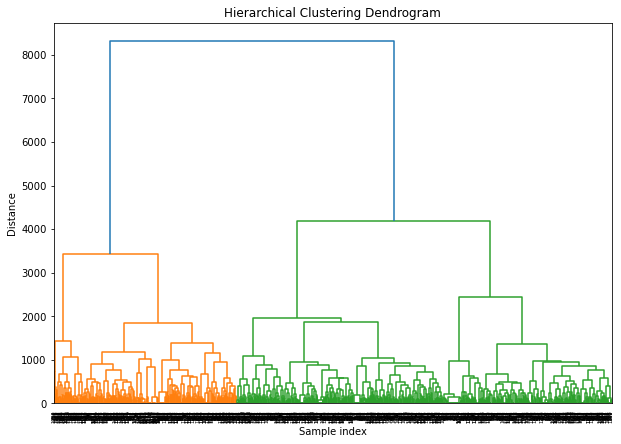

Silhouette Score: 0.18524256673098427
Calinski-Harabasz Index: 448.07744527517593
Davies-Bouldin Index: 1.4714338953783213


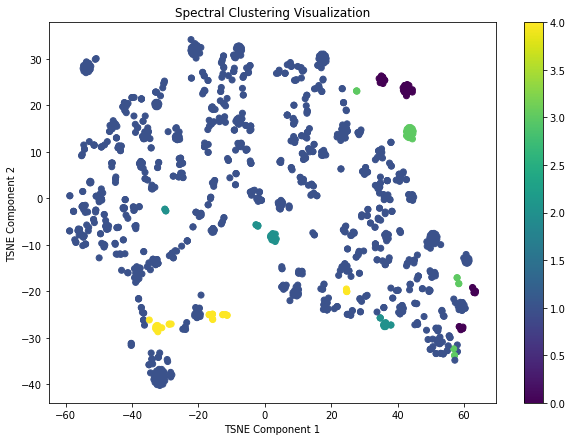

Silhouette Score (Spectral): -0.03232494458917392
Calinski-Harabasz Index (Spectral): 28.106432779522763
Davies-Bouldin Index (Spectral): 1.9535868344507494


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


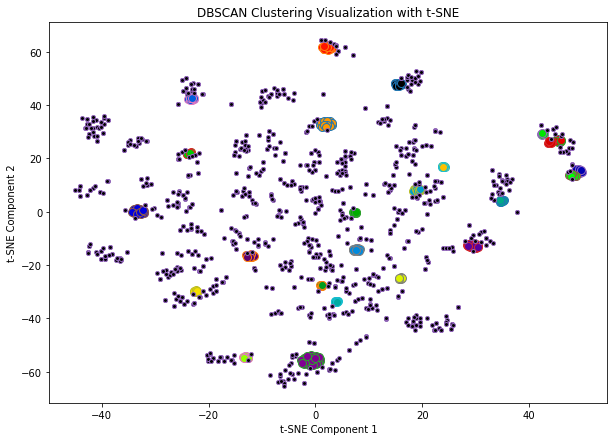

Silhouette Score (DBSCAN): -0.20749398406319797
Calinski-Harabasz Index (DBSCAN): 11.256733321271813
Davies-Bouldin Index (DBSCAN): 0.9599190401842168


In [87]:
hcluster_human_alpha_23_cdr3 = calculate_and_plot_subsets_clusters(human_alpha_23,'human',['alpha'], 1 ,1)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


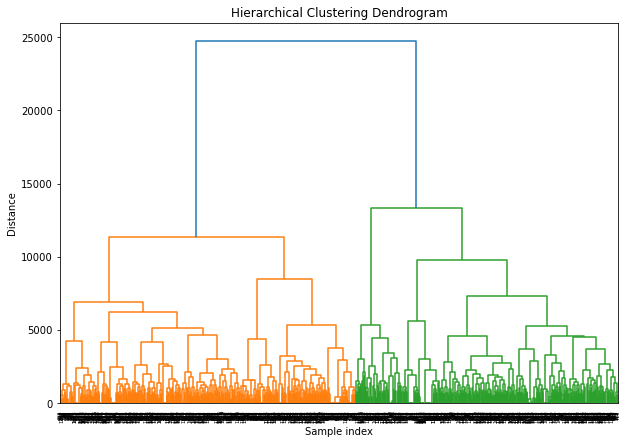

Silhouette Score: 0.13048910603405323
Calinski-Harabasz Index: 234.04407334654678
Davies-Bouldin Index: 1.9055001223316352


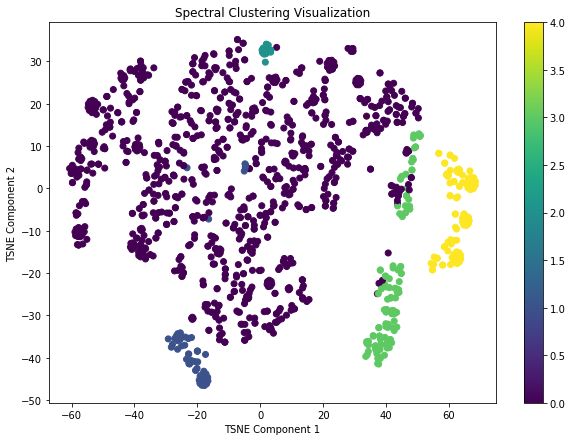

Silhouette Score (Spectral): 0.007402898922192243
Calinski-Harabasz Index (Spectral): 63.68041899903714
Davies-Bouldin Index (Spectral): 1.8307158567622015


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


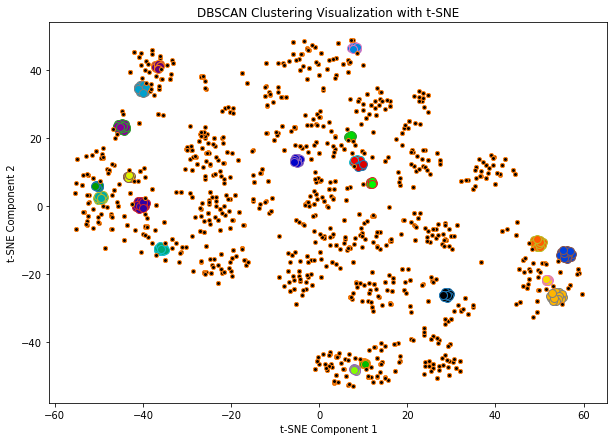

Silhouette Score (DBSCAN): -0.1718988013741328
Calinski-Harabasz Index (DBSCAN): 12.904809798631044
Davies-Bouldin Index (DBSCAN): 0.8738026355976881


In [88]:
hcluster_human_alpha_23 = calculate_and_plot_subsets_clusters(human_alpha_23,'human',['alpha'], 1, 0)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


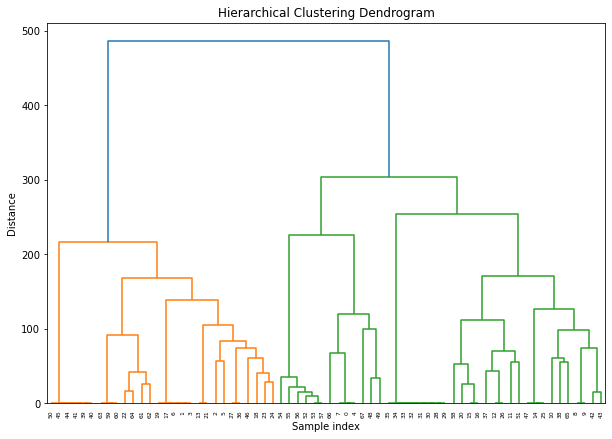

Silhouette Score: 0.3848059459550806
Calinski-Harabasz Index: 26.686262647384215
Davies-Bouldin Index: 1.079885049057029


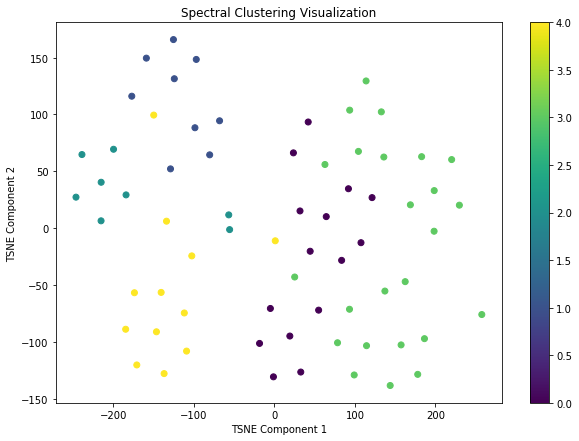

Silhouette Score (Spectral): 0.28020856624092894
Calinski-Harabasz Index (Spectral): 20.45447690660315
Davies-Bouldin Index (Spectral): 1.3432239069955794


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


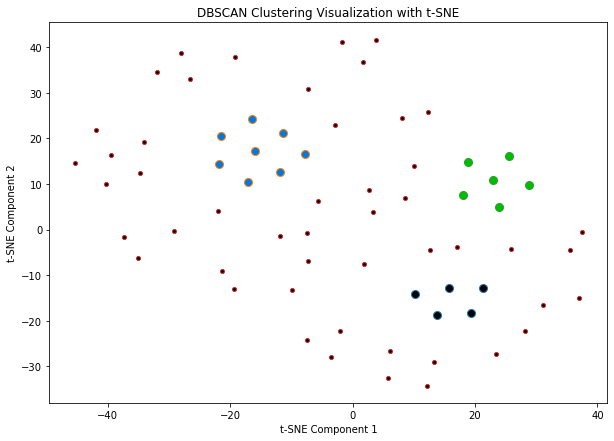

Silhouette Score (DBSCAN): 0.11338289161266478
Calinski-Harabasz Index (DBSCAN): 11.01647635171896
Davies-Bouldin Index (DBSCAN): 0.8130234057656428


In [89]:
hcluster_mouse_alpha_23_cdr3 = calculate_and_plot_subsets_clusters(mouse_alpha_23,'mouse',['alpha'], 1 ,1)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


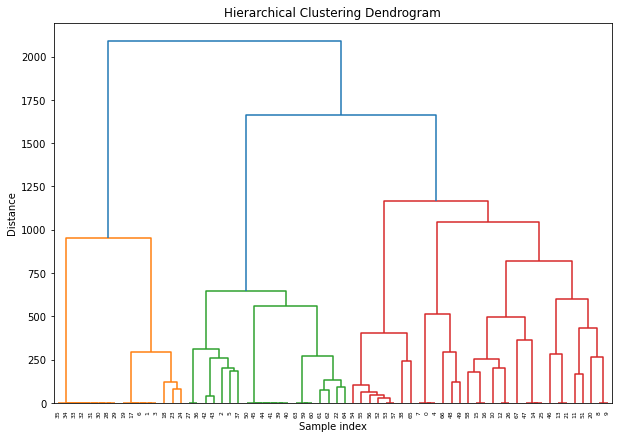

Silhouette Score: 0.4205680639002896
Calinski-Harabasz Index: 32.755256997756746
Davies-Bouldin Index: 1.086002476419517


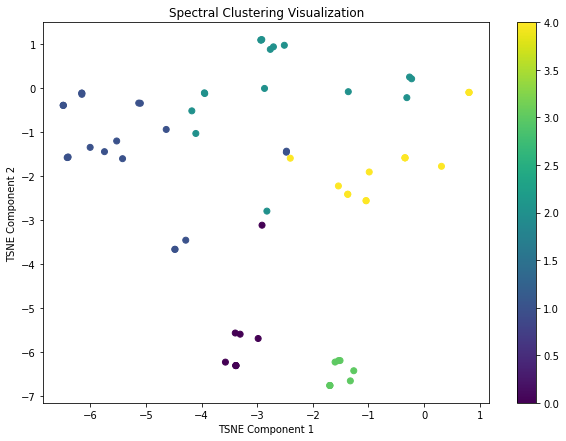

Silhouette Score (Spectral): 0.39318127747641174
Calinski-Harabasz Index (Spectral): 26.18962066672784
Davies-Bouldin Index (Spectral): 1.116832396360255


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


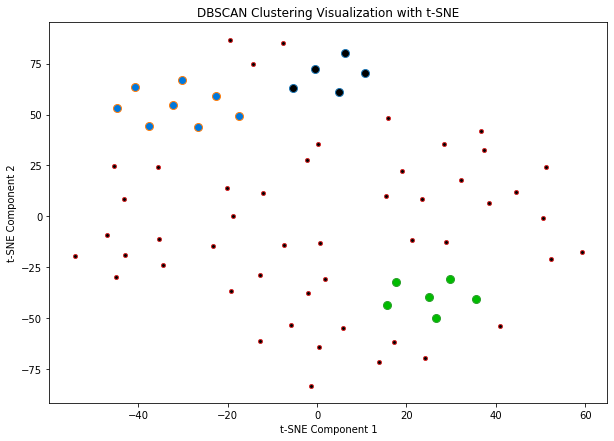

Silhouette Score (DBSCAN): 0.13896179275545673
Calinski-Harabasz Index (DBSCAN): 14.681985708788172
Davies-Bouldin Index (DBSCAN): 0.736220205823077


In [90]:
hcluster_mouse_alpha_23 = calculate_and_plot_subsets_clusters(mouse_alpha_23,'mouse',['alpha'], 1 ,0)

# 3. β

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


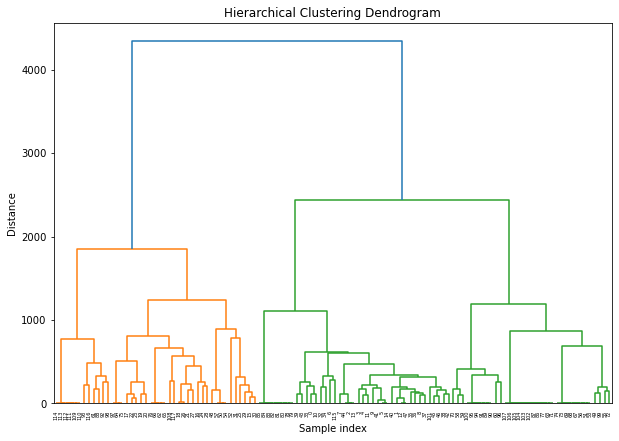

Silhouette Score: 0.40265005661093795
Calinski-Harabasz Index: 75.1455295812815
Davies-Bouldin Index: 1.2072417373368138


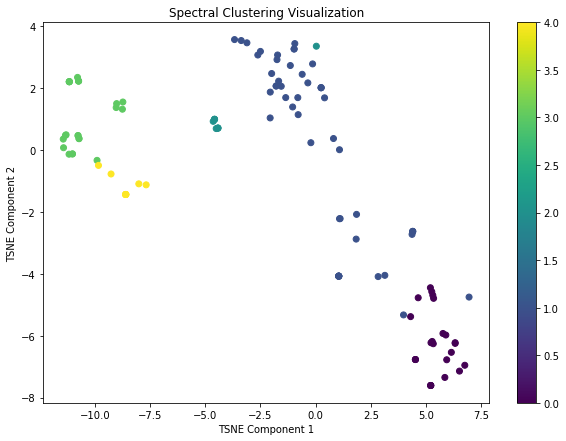

Silhouette Score (Spectral): 0.29454677703209853
Calinski-Harabasz Index (Spectral): 45.519880606566176
Davies-Bouldin Index (Spectral): 1.0537597142588953


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


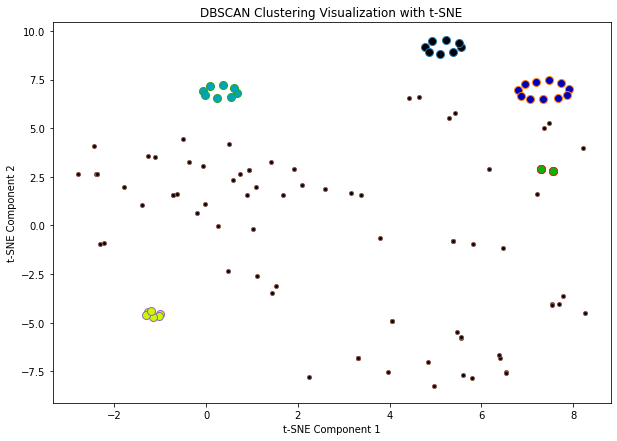

Silhouette Score (DBSCAN): 0.20028115447551306
Calinski-Harabasz Index (DBSCAN): 11.94959623448143
Davies-Bouldin Index (DBSCAN): 0.9093339355968381


In [91]:
hcluster_mouse_beta_23 = calculate_and_plot_subsets_clusters(mouse_beta_23,'mouse',['beta'], 1, 0)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


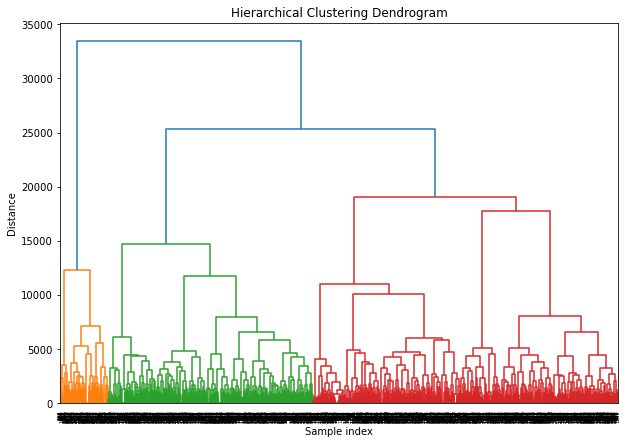

Silhouette Score: 0.135545336523917
Calinski-Harabasz Index: 361.4180661851545
Davies-Bouldin Index: 1.7805899213010803


D:\AJumpy\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


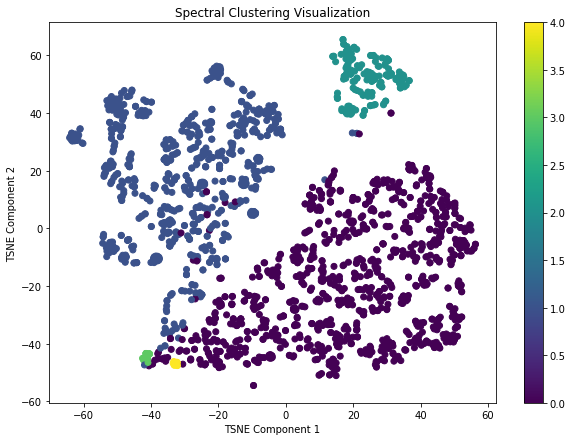

Silhouette Score (Spectral): 0.12560911663992086
Calinski-Harabasz Index (Spectral): 166.53597232581492
Davies-Bouldin Index (Spectral): 1.5019576486823942


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


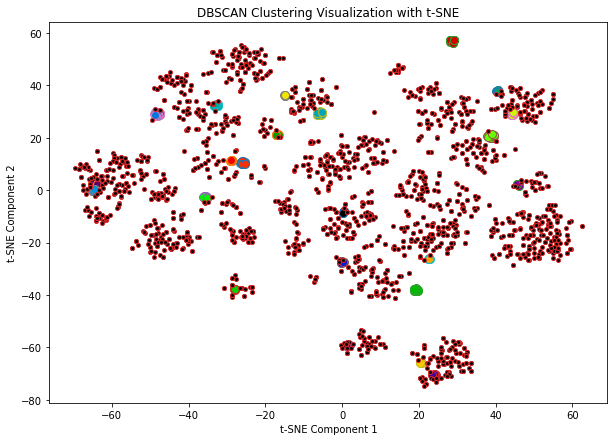

Silhouette Score (DBSCAN): -0.2510090615159958
Calinski-Harabasz Index (DBSCAN): 9.260905785649415
Davies-Bouldin Index (DBSCAN): 1.0178981679545835


In [92]:
hcluster_human_beta_23 = calculate_and_plot_subsets_clusters(human_beta_23,'human',['beta'], 1, 0)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


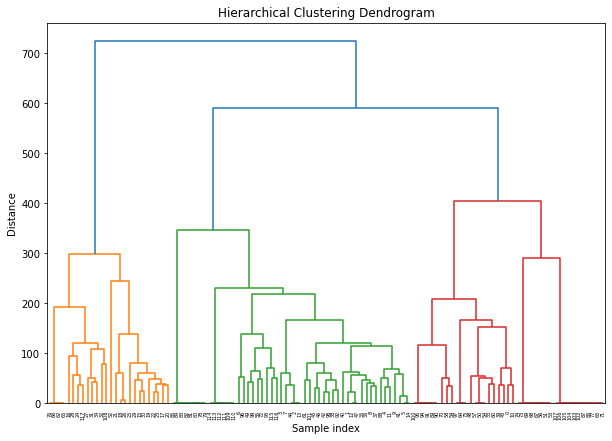

Silhouette Score: 0.3560940156695017
Calinski-Harabasz Index: 44.024572058297345
Davies-Bouldin Index: 1.0393860349550648


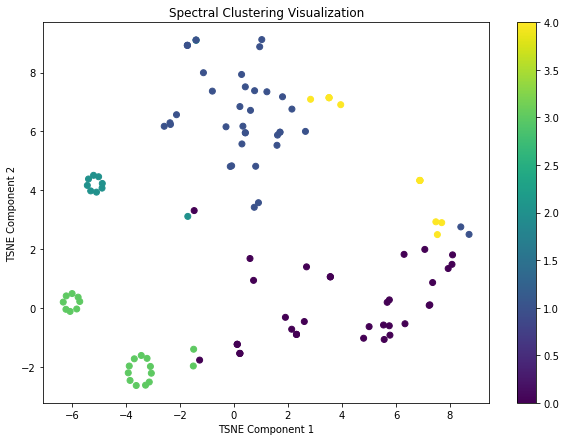

Silhouette Score (Spectral): 0.29375513068980774
Calinski-Harabasz Index (Spectral): 31.87491221070122
Davies-Bouldin Index (Spectral): 1.2191589302477837


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


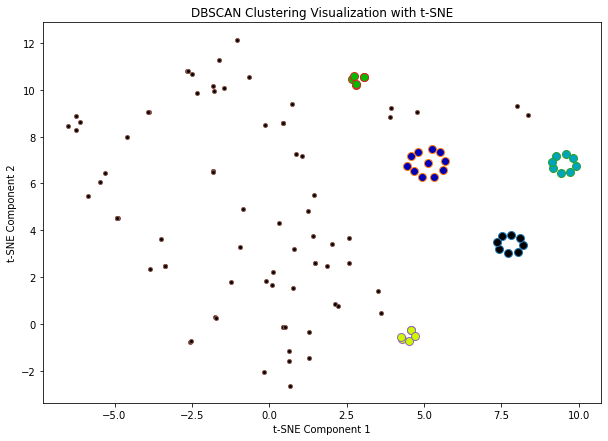

Silhouette Score (DBSCAN): 0.21114143602285826
Calinski-Harabasz Index (DBSCAN): 15.726852576311357
Davies-Bouldin Index (DBSCAN): 0.7910948363504863


In [93]:
hcluster_mouse_beta_23_cdr3 = calculate_and_plot_subsets_clusters(mouse_beta_23,'mouse',['beta'], 1, 1)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


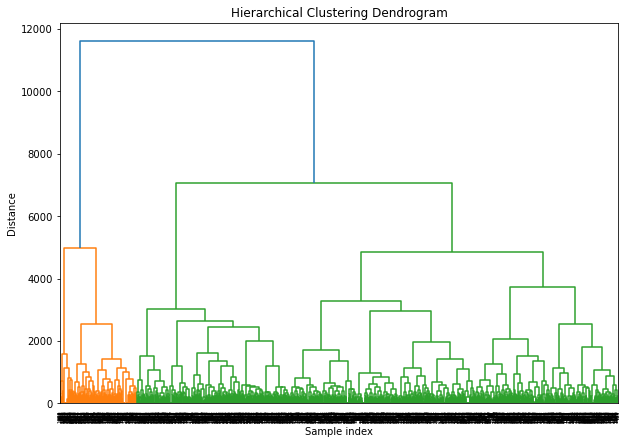

Silhouette Score: 0.13761332677302118
Calinski-Harabasz Index: 541.7045136540812
Davies-Bouldin Index: 1.7499674017308906


D:\AJumpy\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


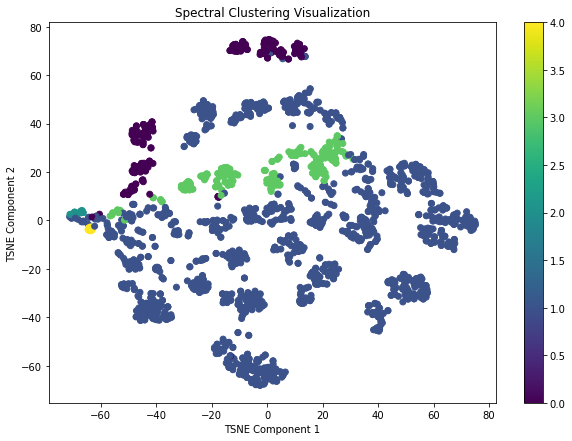

Silhouette Score (Spectral): 0.07539787040480923
Calinski-Harabasz Index (Spectral): 121.9109100528265
Davies-Bouldin Index (Spectral): 1.6944924723125212


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


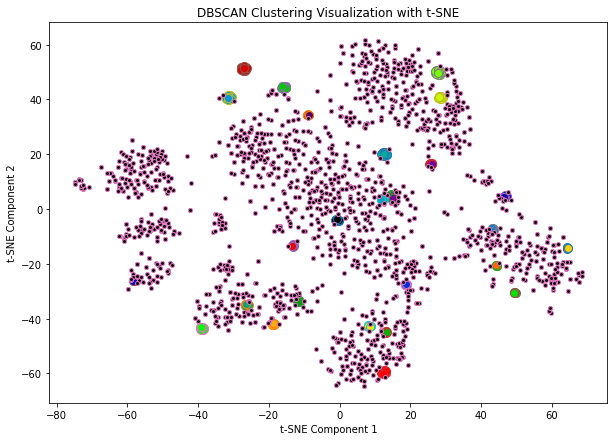

Silhouette Score (DBSCAN): -0.2919241666297181
Calinski-Harabasz Index (DBSCAN): 9.151223552062863
Davies-Bouldin Index (DBSCAN): 1.040487543770775


In [94]:
hcluster_human_beta_23_cdr3 = calculate_and_plot_subsets_clusters(human_beta_23,'human',['beta'], 1, 1)

#  3. Combine

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


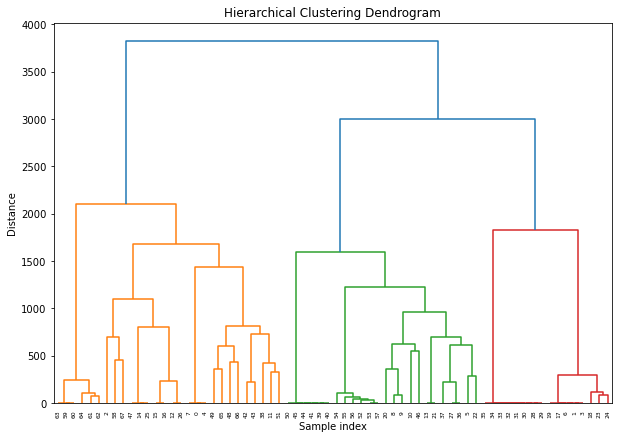

Silhouette Score: 0.45699531248378866
Calinski-Harabasz Index: 29.623549402165125
Davies-Bouldin Index: 0.8670236607985814


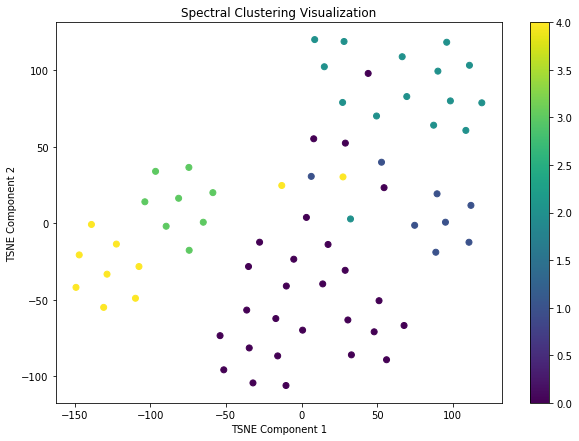

Silhouette Score (Spectral): 0.40730587771163385
Calinski-Harabasz Index (Spectral): 26.672662745184937
Davies-Bouldin Index (Spectral): 0.9515861998482624


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


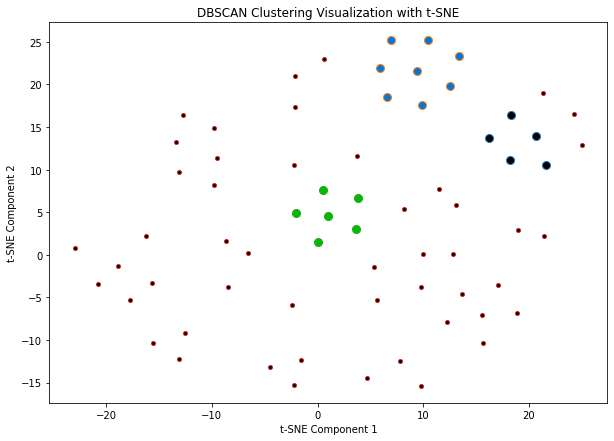

Silhouette Score (DBSCAN): 0.15497975174317538
Calinski-Harabasz Index (DBSCAN): 11.52353010403544
Davies-Bouldin Index (DBSCAN): 0.8179790155650951


In [95]:
hcluster_mouse_23 = calculate_and_plot_subsets_clusters(mouse_23,'mouse',['alpha','beta'], 1, 0)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


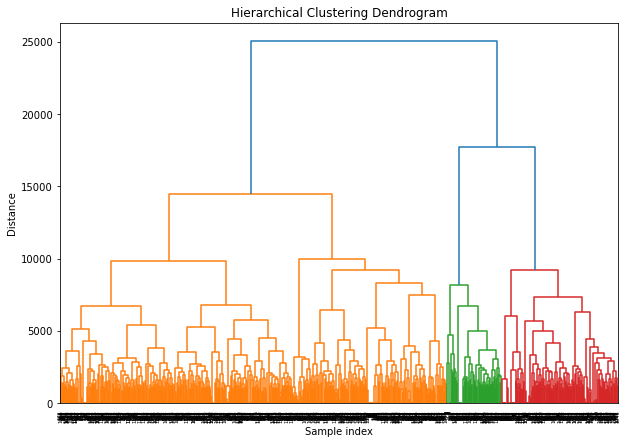

Silhouette Score: 0.08849420879552033
Calinski-Harabasz Index: 121.46669788430015
Davies-Bouldin Index: 2.4752099964258085


D:\AJumpy\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


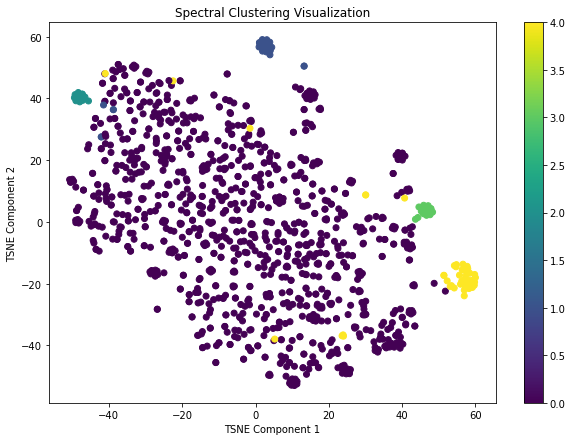

Silhouette Score (Spectral): 0.025221206584745144
Calinski-Harabasz Index (Spectral): 34.31754486864159
Davies-Bouldin Index (Spectral): 1.262266167618733


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


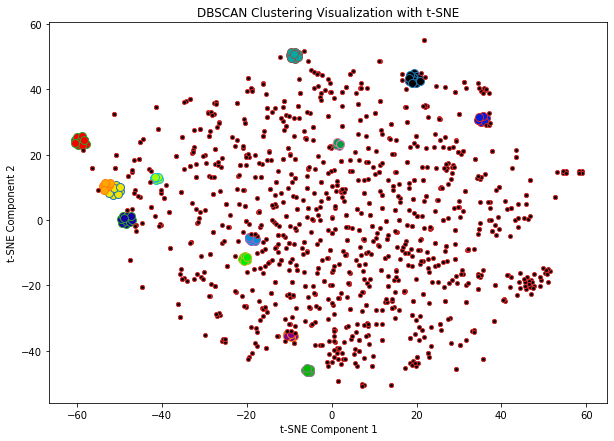

Silhouette Score (DBSCAN): -0.11142892105331915
Calinski-Harabasz Index (DBSCAN): 11.658635012081335
Davies-Bouldin Index (DBSCAN): 0.8825255472582153


In [96]:
hcluster_human_23 = calculate_and_plot_subsets_clusters(human_23,'human',['alpha','beta'], 1, 0)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


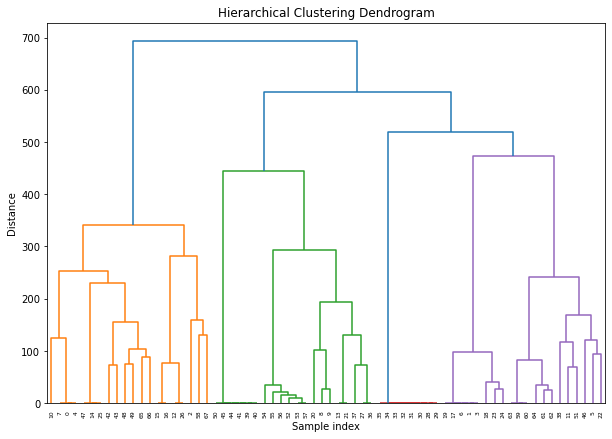

Silhouette Score: 0.4014004430698521
Calinski-Harabasz Index: 22.43876975602663
Davies-Bouldin Index: 1.0670453021103372


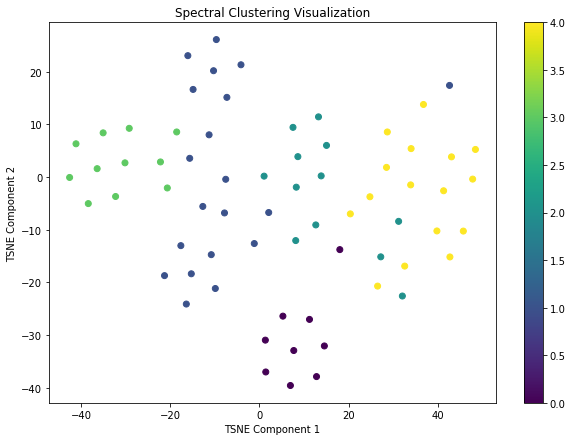

Silhouette Score (Spectral): 0.34065206462629255
Calinski-Harabasz Index (Spectral): 18.14537989413071
Davies-Bouldin Index (Spectral): 1.3026294673987517


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


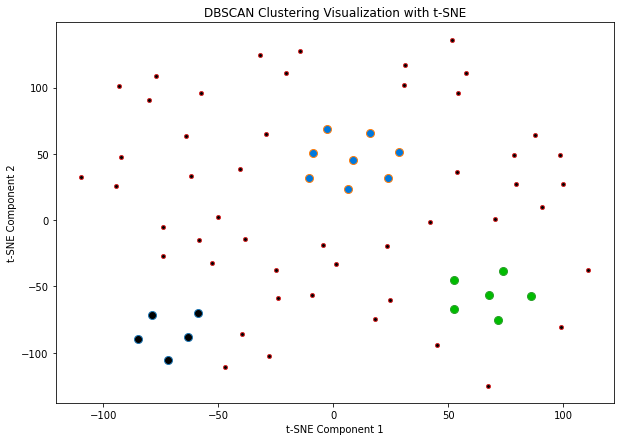

Silhouette Score (DBSCAN): 0.16261587676440997
Calinski-Harabasz Index (DBSCAN): 11.278021149145557
Davies-Bouldin Index (DBSCAN): 0.8106159301695908


In [97]:
hcluster_mouse_23_cdr3 = calculate_and_plot_subsets_clusters(mouse_23,'mouse',['alpha','beta'], 1, 1)

<ipython-input-84-87e187c72bf3>:77: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance, method='ward')


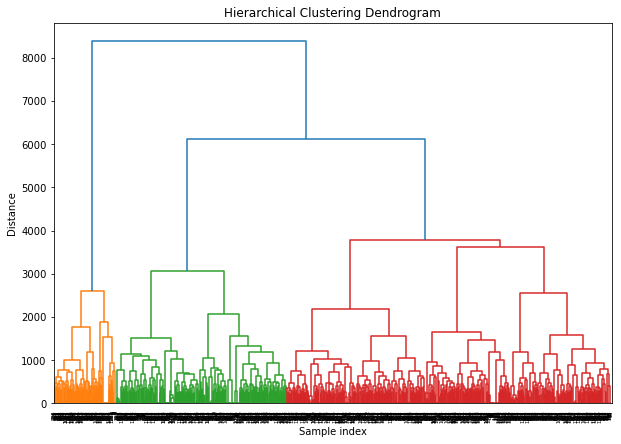

Silhouette Score: 0.10601304754943706
Calinski-Harabasz Index: 212.20416170508423
Davies-Bouldin Index: 2.04848100540568


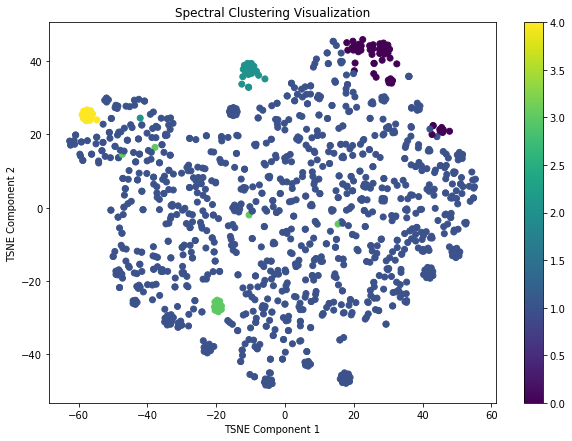

Silhouette Score (Spectral): -0.05357658461125788
Calinski-Harabasz Index (Spectral): 29.797066201671296
Davies-Bouldin Index (Spectral): 1.4588047417718086


D:\AJumpy\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


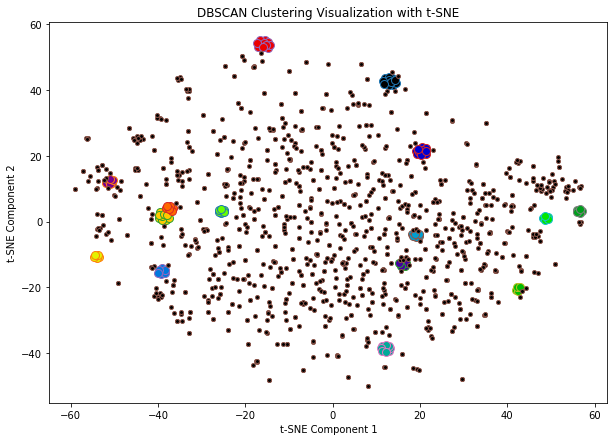

Silhouette Score (DBSCAN): -0.15655971563973678
Calinski-Harabasz Index (DBSCAN): 9.717524669846023
Davies-Bouldin Index (DBSCAN): 0.9682563262440785


In [98]:
hcluster_human_23_cdr3 = calculate_and_plot_subsets_clusters(human_23,'human',['alpha','beta'], 1, 1)